In [1]:
import torch
from utils import dataset
from utils.dataset import get_dataset
from utils.misc import load_config
from utils.transforms import FeaturizeMol, Compose
from torch_geometric.loader import DataLoader
from utils.train import *


/scratch/x2606a03/.conda/envs/diffcsp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/scratch/x2606a03/.conda/envs/diffcsp/lib/python3.10/site-packages/torch_geometric/typing.py:54: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /scratch/x2606a03/.conda/envs/diffcsp/lib/python3.10/site-packages/libpyg.so: undefined symbol: _ZNK3c104impl13OperatorEntry24assertSignatureIsCorrectENS0_12CppSignatureEb
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "


In [2]:
root = './data/geom_drug'
path_dict = {
    'sdf': 'sdf',
    'summary': 'mol_summary.csv',
    'processed': 'processed.lmdb'
}
train_config = load_config('./configs/train/train_MolDiff.yml')
drug_dataset = dataset.Drug3DDataset(
    root = root,
    path_dict = path_dict,
)

In [3]:
featurizer = FeaturizeMol(train_config.chem.atomic_numbers, train_config.chem.mol_bond_types,
                            use_mask_node=train_config.transform.use_mask_node,
                            use_mask_edge=train_config.transform.use_mask_edge
                            )
transform = Compose([
    featurizer,
])

# Datasets and loaders
dataset, subsets = get_dataset(
    config = train_config.dataset,
    transform = transform,
)
train_set, val_set = subsets['train'], subsets['val']
train_iterator = inf_iterator(DataLoader(
        train_set, 
        batch_size = 2, 
        shuffle = True,
        num_workers = 0,
        pin_memory = train_config.train.pin_memory,
        follow_batch = featurizer.follow_batch,
        exclude_keys = featurizer.exclude_keys,
    ))

Num of samples: ('train', 231523) ('val', 28941) ('test', 28940)


In [4]:
sample_batch = next(train_iterator)
print(sample_batch)

Drug3DDataBatch(element=[35], bond_index=[2, 74], i_conf_list=[2], mol_id=[2], num_nodes=35, node_type=[35], node_type_batch=[35], node_type_ptr=[3], node_pos=[35, 3], i_conf=[2], halfedge_index=[2, 345], halfedge_type=[345], halfedge_type_batch=[345], halfedge_type_ptr=[3], batch=[35], ptr=[3])


In [5]:
for k in sample_batch.keys():
    print(k, sample_batch[k])
    if k == 'pos_all_confs':
        print(sample_batch[k].shape)
# halfedge_type = 

halfedge_type tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
        4, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
        4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 

In [17]:
halfedge_type = torch.Tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0,
        4, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
        4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 0, 1])
print("nonzeros", len(torch.nonzero(halfedge_type)))

nonzeros 37


In [15]:
halfedge_index_test = torch.Tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
          2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  5,
          5,  5,  5,  6,  6,  6,  7,  7,  8, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
         11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
         11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
         13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
         15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,
         16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
         17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
         18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
         19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
         20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22,
         22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23,
         23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25,
         25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27,
         28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31,
         32, 32, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9,  2,  3,  4,  5,  6,  7,  8,  9,  3,
          4,  5,  6,  7,  8,  9,  4,  5,  6,  7,  8,  9,  5,  6,  7,  8,  9,  6,
          7,  8,  9,  7,  8,  9,  8,  9,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
         20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 12, 13, 14,
         15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33, 34, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
         26, 27, 28, 29, 30, 31, 32, 33, 34, 15, 16, 17, 18, 19, 20, 21, 22, 23,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 16, 17, 18, 19, 20, 21, 22,
         23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 17, 18, 19, 20, 21, 22,
         23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 18, 19, 20, 21, 22, 23,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 19, 20, 21, 22, 23, 24, 25,
         26, 27, 28, 29, 30, 31, 32, 33, 34, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33, 34, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 23, 24, 25,
         26, 27, 28, 29, 30, 31, 32, 33, 34, 24, 25, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 27, 28, 29, 30, 31, 32, 33, 34, 28, 29, 30, 31, 32, 33, 34,
         29, 30, 31, 32, 33, 34, 30, 31, 32, 33, 34, 31, 32, 33, 34, 32, 33, 34,
         33, 34, 34]])
symmetrized_halfedge_index = torch.cat([halfedge_index_test, halfedge_index_test.flip(0)], dim=1)
print(halfedge_index_test.shape, symmetrized_halfedge_index.shape)

torch.Size([2, 345]) torch.Size([2, 690])


In [6]:
import torch_geometric as pyg
from torch_geometric.datasets import QM9
from torch_geometric.loader import DataLoader

In [7]:
qm9_dataset = QM9(root='/scratch/x2606a03/research/data/QM9/')
qm9_dataloader = inf_iterator(DataLoader(qm9_dataset, batch_size=2, shuffle=True))

In [34]:
qm9_data = next(qm9_dataloader)
print(qm9_data)
#print(qm9_data.edge_attr)
print("node type : ", qm9_data.z.shape, qm9_data.z)
node_type = qm9_data.z
node_pos = qm9_data.pos
batch_node = qm9_data.batch
bond_index = qm9_data.edge_index
#print("edge_attr : ", qm9_data.edge_attr.shape, qm9_data.edge_attr)
bond_attr = qm9_data.edge_attr.nonzero()[:, 1]+1
print("bond attr : ", bond_attr.shape, bond_attr)
ptr = qm9_data.ptr
print("bond index : ", qm9_data.edge_index.shape, qm9_data.edge_index)
print("idx: ", qm9_data.idx)
print("ptr: ", qm9_data.ptr)
print(qm9_data.z[qm9_data.ptr[0]:qm9_data.ptr[1]])

DataBatch(x=[36, 11], edge_index=[2, 78], edge_attr=[78, 4], y=[2, 19], pos=[36, 3], idx=[2], name=[2], z=[36], batch=[36], ptr=[3])
node type :  torch.Size([36]) tensor([7, 6, 7, 6, 6, 6, 8, 6, 6, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 8, 6,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
bond attr :  torch.Size([78]) tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
        3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])
bond index :  torch.Size([2, 78]) tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  7,  7,  8,  8,  9, 10, 11, 12, 13, 14, 15, 15, 15, 15,
         16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20,
         20, 20, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35],
        [ 1,  9, 10,  0

directed_edge_index :  torch.Size([2, 39]) tensor([[ 0,  0,  0,  1,  1,  2,  3,  3,  3,  4,  4,  4,  5,  5,  7,  8, 15, 15,
         15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21,
         21, 22, 23],
        [ 1,  9, 10,  2,  6,  3,  4,  5, 11,  5, 12, 13,  6,  7,  8, 14, 16, 24,
         25, 26, 17, 18, 23, 18, 27, 28, 19, 29, 20, 23, 30, 21, 31, 32, 22, 33,
         34, 23, 35]])
attr_mat :  torch.Size([36, 36]) tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


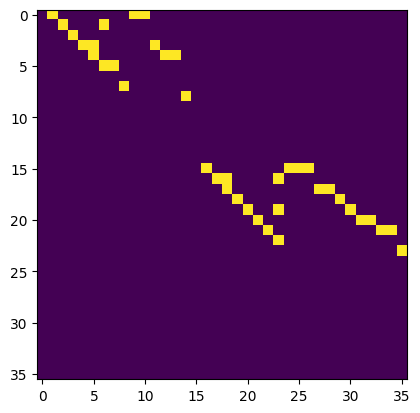

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n_nodes = ptr[-1]
adj_mat = torch.zeros(n_nodes, n_nodes)
adj_mat[bond_index[0], bond_index[1]] = 1.
directed_adj_mat = torch.triu(adj_mat, diagonal=1)
directed_edge_index = directed_adj_mat.nonzero().t() # upper triangular edge index

# map edge_attr 
edge_attr_map = {torch.tensor([1, 0, 0, 0]): 1,
                torch.tensor([0, 1, 0, 0]): 2,
                torch.tensor([0, 0, 1, 0]): 3,
                torch.tensor([0, 0, 0, 1]): 4}

attr_mat = torch.zeros(n_nodes, n_nodes)
for i, (row, col) in enumerate(zip(bond_index[0], bond_index[1])):
    attr_mat[row, col] = bond_attr[i]

print("directed_edge_index : ", directed_edge_index.shape, directed_edge_index)
print("attr_mat : ", attr_mat.shape, attr_mat)
test_arr = directed_adj_mat.numpy()
#print(bond_index)
plt.imshow(test_arr)
plt.show()

In [ ]:
upper_diagonal = torch.triu(test_tensor, diagonal=1)
